In [508]:
import os
import pandas as pd
import nbformat

In [509]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/'

In [510]:
df=pd.read_csv('blockdesignscore.csv')

In [511]:
df.head()

,Unnamed: 0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Block Design raw,Block Design scale
0,0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,...,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Block Design Raw Score (enter total raw score ...,Block Design Scaled Score (leave blank for now)
1,1,26-03-2024 08:46,26-03-2024 11:16,IP Address,134.68.238.70,100,9034,TRUE,16:39.9,R_2rrxPiBnpi7vtcF,...,4,4,5,6,0,4,4,0,43,NaN
2,2,26-03-2024 11:16,26-03-2024 11:23,IP Address,134.68.238.70,100,403,TRUE,23:29.2,R_3kSmCS6oV1Tu03b,...,4,4,6,6,4,6,6,0,52,NaN
3,3,26-03-2024 12:12,26-03-2024 12:22,IP Address,149.166.150.87,100,633,TRUE,22:57.2,R_5JvYYwe33wVJhAG,...,4,4,5,6,0,4,0,0,36,39
4,4,26-03-2024 13:50,26-03-2024 13:53,IP Address,149.166.150.87,100,193,TRUE,53:51.8,R_703fNA5glmzA33H,...,4,4,4,0,0,NaN,NaN,NaN,28,28


In [512]:
action_wais_df=pd.read_csv('Action_Wais.csv')

In [513]:
# Strip trailing spaces from column names in action_wais_df
action_wais_df.columns = action_wais_df.columns.str.strip()

# Rename 'Q1' to 'Participant' in wais_selected_df
wais_selected_df = df[['Q1', 'Block Design raw']].rename(columns={'Q1': 'Participant', 'Block Design raw': 'Block Design Raw Score'})

A_Wais_Score= pd.merge(action_wais_df, wais_selected_df, on='Participant', how='inner')

#A_Wais_Score.head(20)


In [514]:
A_Wais_Score.at[3, 'Block Design Raw Score'] = '34'

In [515]:
A_Wais_Score.to_csv('A_BDScore.csv')

#### Extracting features and merging all participants - Total Actions, Time Spent, Total Missed Interactions

In [516]:
# List to store the dataframes
dfs = []

# Function to execute cells and extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    totals_df = None
    plot_keywords = ['plt.', 'plotly.', 'seaborn.']
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            if any(keyword in cell.source for keyword in plot_keywords):
                continue  # Skip cells that generate plots
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    totals_df = exec_env.get('totals_df')
    return totals_df

# Process each notebook file
for filename in os.listdir(directory):
     if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        totals_df = extract_totals_df(nb)
        
        if totals_df is not None:
            print(f"Extracted totals_df from {filename}")
            dfs.append(totals_df)
        else:
            print(f"No totals_df found in {filename}")


combined_df = pd.concat(dfs)
merged_df = pd.read_csv('A_BDScore.csv')
final_df = pd.merge(merged_df, combined_df, on='Participant', how='left')
final_df = final_df.drop(columns=[col for col in final_df.columns if 'Unnamed' in col])


Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C001A_ActionSteps.ipynb
Extracted totals_df from C001A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C003A_ActionSteps.ipynb
Extracted totals_df from C003A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C006D_ActionSteps.ipynb
Extracted totals_df from C006D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C008D_ActionSteps.ipynb
Extracted totals_df from C008D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C009A_ActionSteps.ipynb
Extracted totals_df from C009A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexPie/C012D_ActionSteps.ipynb
Extracted totals_df from C012D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MA

In [517]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions
0,C001,36,171,319.556571,10.0
1,C003,58,172,362.351788,10.0
2,C006,42,199,570.236635,24.0
3,C008,34,254,466.281171,27.0
4,C009,24,198,438.425413,2.0
5,C012,54,247,532.936495,8.0
6,C013,48,266,580.830070,22.0
7,C016,39,208,517.807503,13.0
8,C017,36,170,369.351203,11.0
9,C020,30,222,565.967667,7.0


#### Scatter Plot between Block Design Score and Total Actions

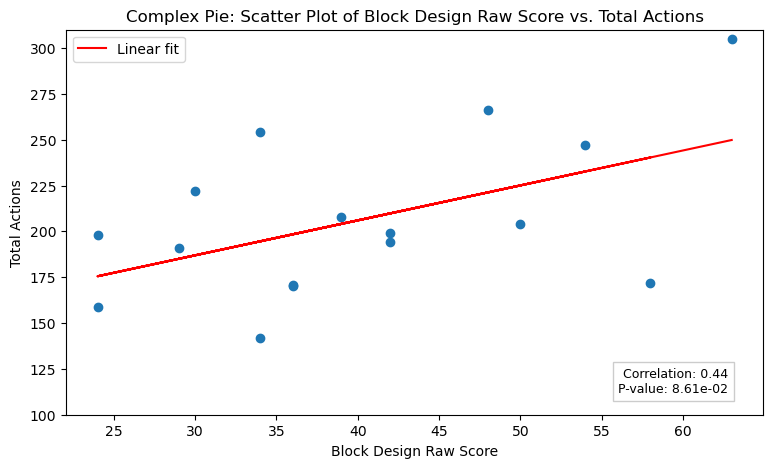

In [518]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Actions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Actions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Actions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Actions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Actions')
plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/'
folder_path = os.path.join(directory, 'Plots/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '1 CP_TotalActions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Scatter Plot between Block Design Score and Total Missed Interactions

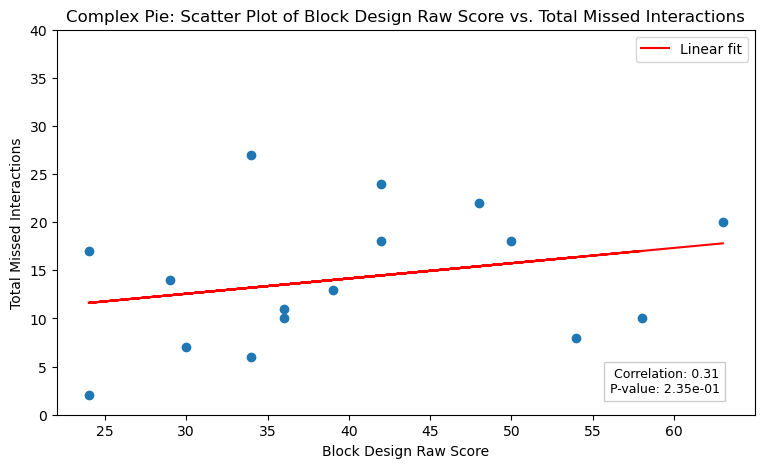

In [519]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Missed Interactions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Missed Interactions')
plt.ylim(0,40)
plt.legend()
file_path = os.path.join(folder_path, '2 CP_MissedInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Scatter Plot between Block Design Score and Total Time Spent

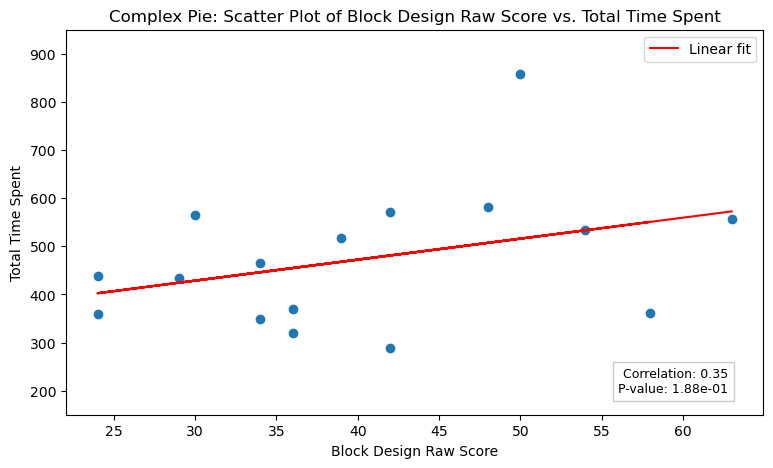

In [520]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Time Spent'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Time Spent'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Time Spent'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Time Spent')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Time Spent')
plt.ylim(150,950)
plt.legend()
file_path = os.path.join(folder_path, '3 CP_TotalTimeSpent.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [521]:
Int_ob=pd.read_csv('InteractedObjects_ComplexPie.csv')
Int_ob

,Unnamed: 0,C001,C003,C006,C008,C009,C012,C013,C016,C017,...,C021,C024,C025,C028,C029,C032,Mean,Median,Std Dev,IQR
0,newmeasuringcup,16,2,14,6,4,6,10,10,8,...,14,2,6,2,20,14,9,9,5,7
1,piebowl,12,16,18,16,16,30,14,20,14,...,12,30,6,16,22,42,18,16,8,6
2,knife,12,22,10,30,14,36,26,12,12,...,2,16,8,12,10,22,17,14,9,11
3,applepiecookbook,6,7,27,9,7,9,7,6,11,...,11,7,8,9,4,7,8,7,4,2
4,staticmeshactor,12,14,16,24,18,24,24,22,10,...,6,6,4,10,16,6,14,14,6,8
5,stirspoonpie,6,6,8,12,6,14,14,12,6,...,4,4,2,2,10,20,8,8,4,5
6,apple,65,56,37,93,73,87,88,70,69,...,55,76,66,91,31,68,69,69,16,17
7,cinnyshakergrabable,4,2,2,2,4,6,14,4,2,...,2,4,2,2,2,16,4,4,4,2
8,piepan,4,12,8,8,4,4,8,4,4,...,14,8,8,14,0,6,7,7,3,4
9,waterpitcher,4,2,8,6,14,4,6,6,2,...,4,2,2,8,2,22,6,6,5,4


In [522]:
total_interactions = Int_ob.iloc[-1, 1:-4].astype(int)

# Create a DataFrame for total interactions
total_interactions_df = pd.DataFrame(total_interactions).reset_index()
total_interactions_df.columns = ['Participant', 'Total Object Interactions']

# Ensure participant column format matches final_df
total_interactions_df['Participant'] = total_interactions_df['Participant'].str.upper()
total_interactions_df


,Participant,Total Object Interactions
0,C001,161
1,C003,162
2,C006,175
3,C008,227
4,C009,196
5,C012,239
6,C013,244
7,C016,195
8,C017,159
9,C020,215


In [523]:
final_df= pd.merge(final_df, total_interactions_df, on='Participant', how='left')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions
0,C001,36,171,319.556571,10.0,161
1,C003,58,172,362.351788,10.0,162
2,C006,42,199,570.236635,24.0,175
3,C008,34,254,466.281171,27.0,227
4,C009,24,198,438.425413,2.0,196
5,C012,54,247,532.936495,8.0,239
6,C013,48,266,580.830070,22.0,244
7,C016,39,208,517.807503,13.0,195
8,C017,36,170,369.351203,11.0,159
9,C020,30,222,565.967667,7.0,215


#### Scatter Plot between Block Design Score and Total Object Interactions

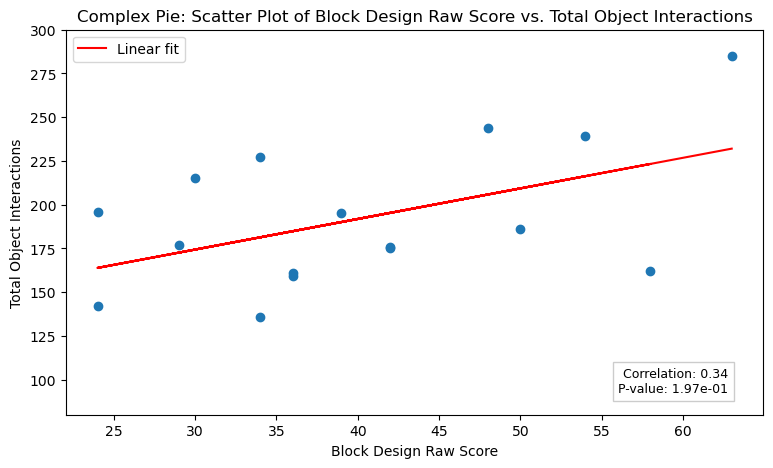

In [524]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Object Interactions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Object Interactions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Object Interactions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Object Interactions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Object Interactions')
plt.ylim(80,300)
plt.legend()
file_path = os.path.join(folder_path, '4 CP_TotalObjectInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Time Variability among Participants

In [525]:
time_variability=pd.read_csv('TimeVariability_ComplexPie.csv')

In [526]:
time_variability = time_variability[['Participant', 'Time Spent S.D']]
final_df=pd.merge(final_df, time_variability, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D
0,C001,36,171,319.556571,10.0,161,21.491310
1,C003,58,172,362.351788,10.0,162,35.154070
2,C006,42,199,570.236635,24.0,175,56.950739
3,C008,34,254,466.281171,27.0,227,58.660959
4,C009,24,198,438.425413,2.0,196,47.728880
5,C012,54,247,532.936495,8.0,239,53.877959
6,C013,48,266,580.830070,22.0,244,61.982680
7,C016,39,208,517.807503,13.0,195,46.610894
8,C017,36,170,369.351203,11.0,159,35.590809
9,C020,30,222,565.967667,7.0,215,34.357832


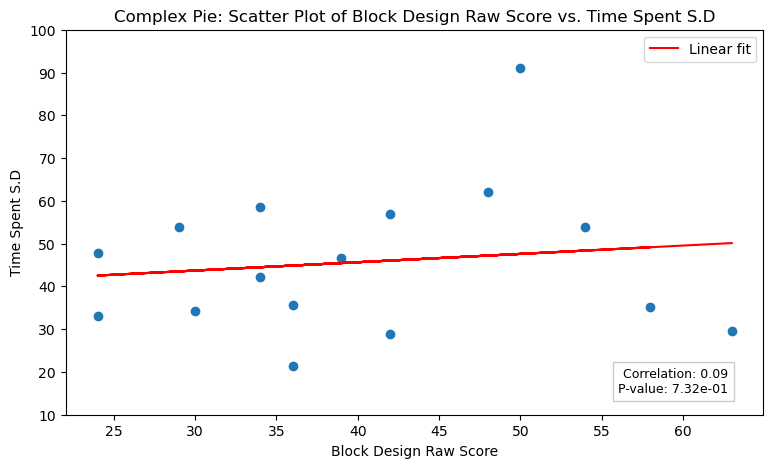

In [527]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Time Spent S.D'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Time Spent S.D'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Time Spent S.D'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Time Spent S.D')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Time Spent S.D')
plt.ylim(10,100)
plt.legend()
file_path = os.path.join(folder_path, '5 CP_TimeVariability.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Action Count Variability

In [528]:
action_variability=pd.read_csv('ActionCountVariability_ComplexPie.csv')

In [529]:
action_variability = action_variability[['Participant', 'Action Count S.D']]
final_df=pd.merge(final_df, action_variability, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672


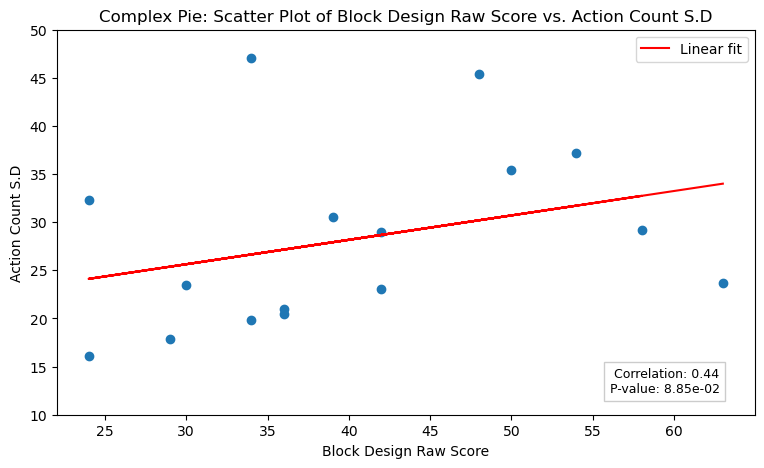

In [530]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Action Count S.D'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Action Count S.D'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Action Count S.D'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action Count S.D')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count S.D')
plt.ylim(10,50)
plt.legend()
file_path = os.path.join(folder_path, '6 CP_ActionVariability.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Total Completed Steps

In [531]:
totalsteps=pd.read_csv('TotalCompletedSteps_ComplexPie.csv')

In [532]:
totalsteps = totalsteps[['Participant', 'Total Completed Steps']]
final_df=pd.merge(final_df, totalsteps, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18


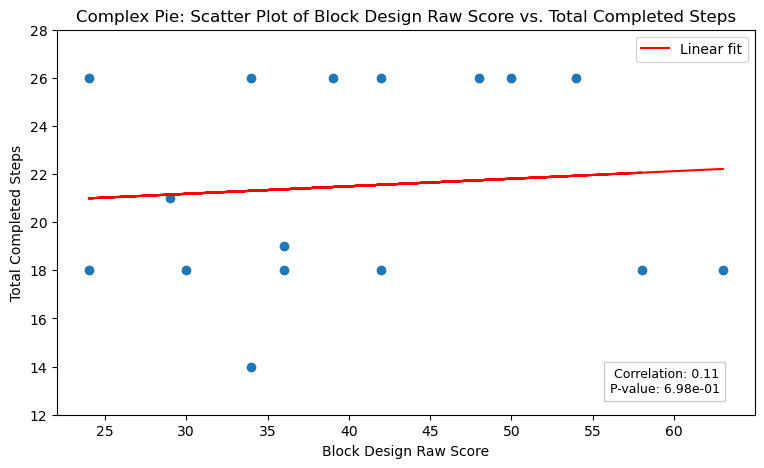

In [533]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Completed Steps'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Completed Steps'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Completed Steps'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Completed Steps')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Completed Steps')
plt.ylim(12,28)
plt.legend()
file_path = os.path.join(folder_path, '7 CP_TotalCompletedSteps.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block design score and count of object interactions under every step

In [534]:
IntOb = pd.read_csv('InteractedObjects_PerStep.csv')

In [535]:
filtered_apples = IntOb[IntOb['Completed Step'] == 'Add apples to pan']

In [536]:
IntOb_Step = filtered_apples[['Participant', 'Apple']]
final_df=pd.merge(final_df, IntOb_Step, on ='Participant', how= 'inner')

In [537]:
final_df.rename(columns={'Apple': 'Apple Interactions - Add Apples'}, inplace=True)
final_df


,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18,49
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18,56
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18,25
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26,87
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26,73
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26,83
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26,88
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26,68
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19,37
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18,33


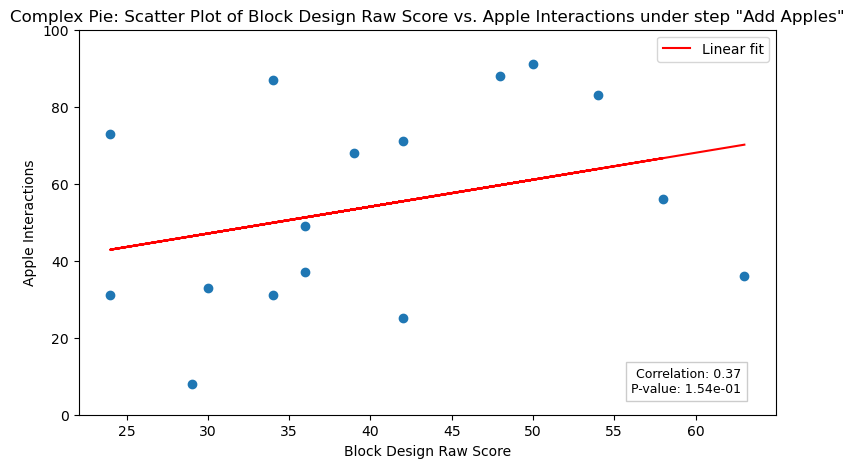

In [538]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Apple Interactions - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Apple Interactions - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Apple Interactions - Add Apples'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Apple Interactions under step "Add Apples"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Apple Interactions')
plt.ylim(0,100)
plt.legend()
file_path = os.path.join(folder_path, '8 CP_AppleInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block design score and Action Count under every step

In [539]:
actionstep=pd.read_csv('ActionCountVariability_ComplexPie.csv')

In [540]:
Action_step = actionstep[['Participant','Add Sugar ','Add apples to pan','Add cinnamon','Stir bowl','Put pie in oven','Add butter','Add crust top','Add water']]
final_df=pd.merge(final_df, Action_step, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,Add Sugar,Add apples to pan,Add cinnamon,Stir bowl,Put pie in oven,Add butter,Add crust top,Add water
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18,49,12,75,26,11,10,16,10,3
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18,56,5,103,4,9,10,9,5,2
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18,25,15,83,12,27,11,9,4,25
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26,87,15,164,6,18,10,16,7,3
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26,73,11,114,4,17,5,20,9,2
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26,83,10,131,14,38,8,12,11,6
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26,88,8,160,9,18,7,20,4,12
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26,68,7,109,11,11,6,21,21,6
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19,37,11,49,2,62,8,15,5,1
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18,33,13,52,78,21,11,15,8,3


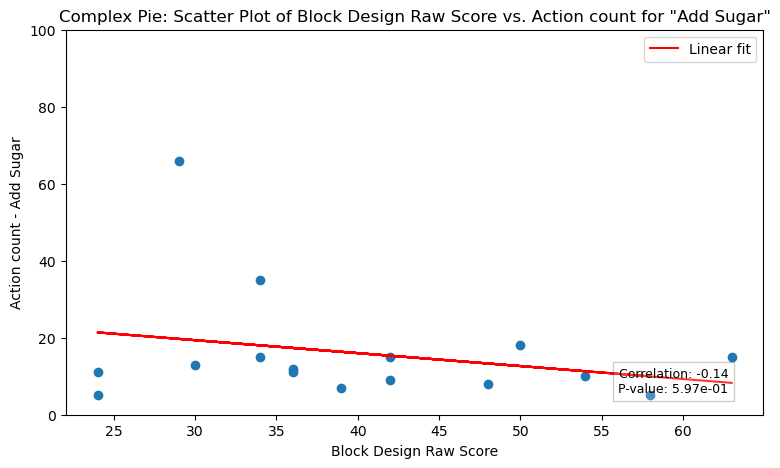

In [541]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Sugar '])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Sugar '])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Sugar '], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count - Add Sugar')
plt.ylim(0,100)
plt.legend()
file_path = os.path.join(folder_path, '9 CP_CountAddSugar.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

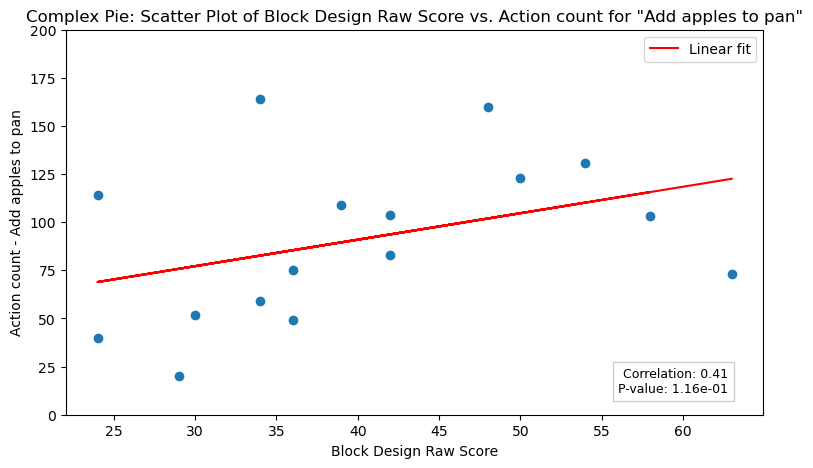

In [542]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add apples to pan'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add apples to pan'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add apples to pan'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count - Add apples to pan')
plt.ylim(0,200)
plt.legend()
file_path = os.path.join(folder_path, '10 CP_CountAddApples.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

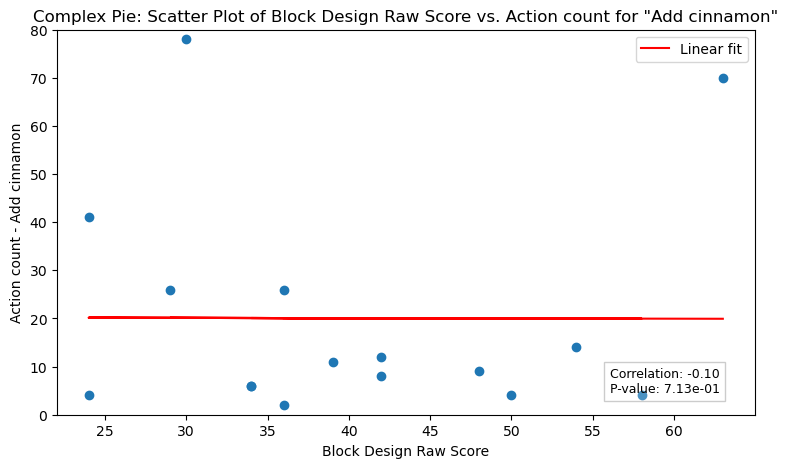

In [543]:

correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add cinnamon'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count - Add cinnamon')
plt.ylim(0,80)
plt.legend()
file_path = os.path.join(folder_path, '11 CP_CountAddCinnamon.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

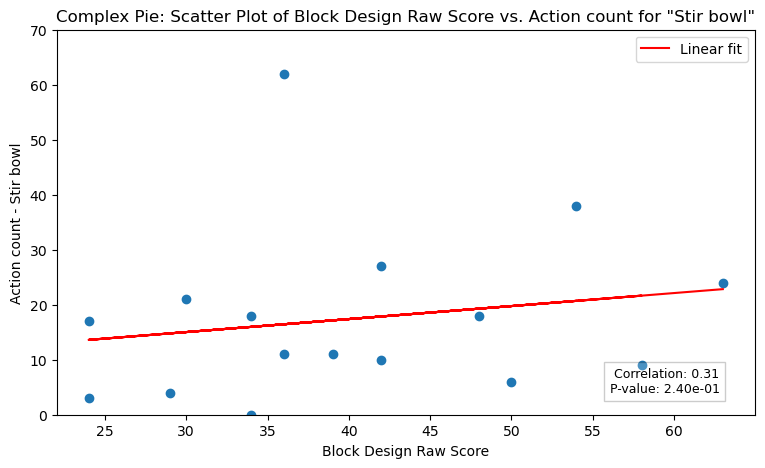

In [544]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Stir bowl'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Stir bowl'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Stir bowl'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Stir bowl"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count - Stir bowl')
plt.ylim(0,70)
plt.legend()
file_path = os.path.join(folder_path, '12 CP_CountStirBowl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

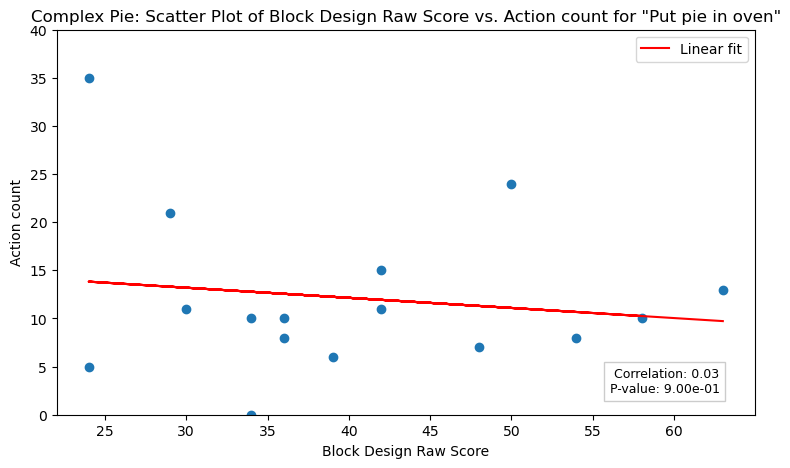

In [545]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Put pie in oven'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Put pie in oven'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Put pie in oven'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Put pie in oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,40)
plt.legend()
file_path = os.path.join(folder_path, '13 CP_CountPutPieInOven.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

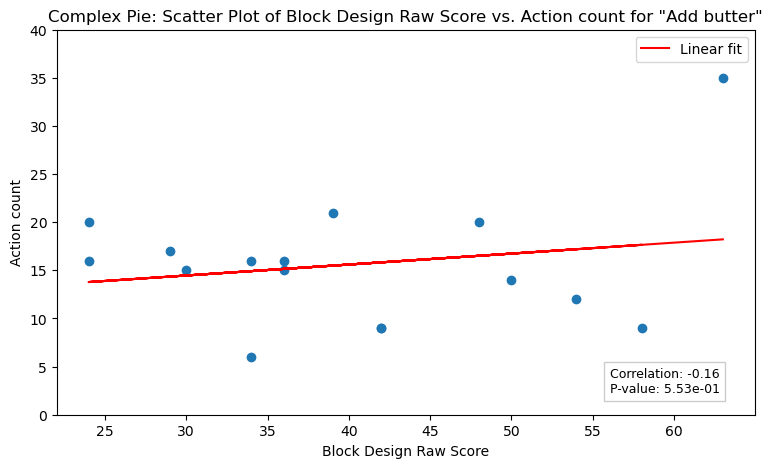

In [546]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add butter'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add butter'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add butter'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,40)
plt.legend()
file_path = os.path.join(folder_path, '14 CP_CountAddButter.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

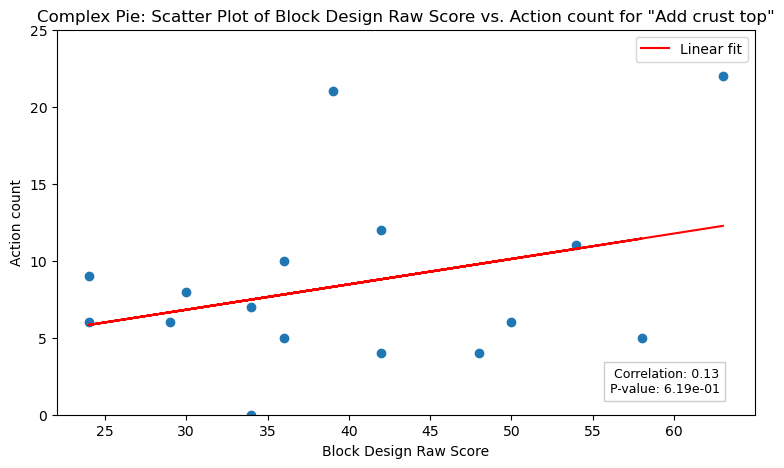

In [547]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add crust top'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add crust top'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add crust top'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add crust top"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,25)
plt.legend()
file_path = os.path.join(folder_path, '15 CP_CountAddCrustTop.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

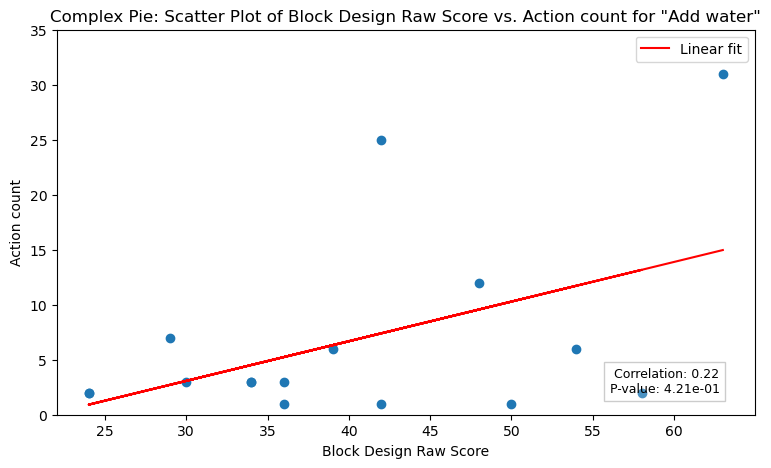

In [548]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add water'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add water'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add water'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,35)
plt.legend()
file_path = os.path.join(folder_path, '16 CP_CountAddWater.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Error to Action Ratio

In [549]:
final_df['Error to Actions Ratio'] = final_df['Total Missed Interactions'] / final_df['Total Actions']


In [550]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,Add Sugar,Add apples to pan,Add cinnamon,Stir bowl,Put pie in oven,Add butter,Add crust top,Add water,Error to Actions Ratio
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18,49,12,75,26,11,10,16,10,3,0.058480
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18,56,5,103,4,9,10,9,5,2,0.058140
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18,25,15,83,12,27,11,9,4,25,0.120603
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26,87,15,164,6,18,10,16,7,3,0.106299
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26,73,11,114,4,17,5,20,9,2,0.010101
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26,83,10,131,14,38,8,12,11,6,0.032389
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26,88,8,160,9,18,7,20,4,12,0.082707
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26,68,7,109,11,11,6,21,21,6,0.062500
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19,37,11,49,2,62,8,15,5,1,0.064706
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18,33,13,52,78,21,11,15,8,3,0.031532


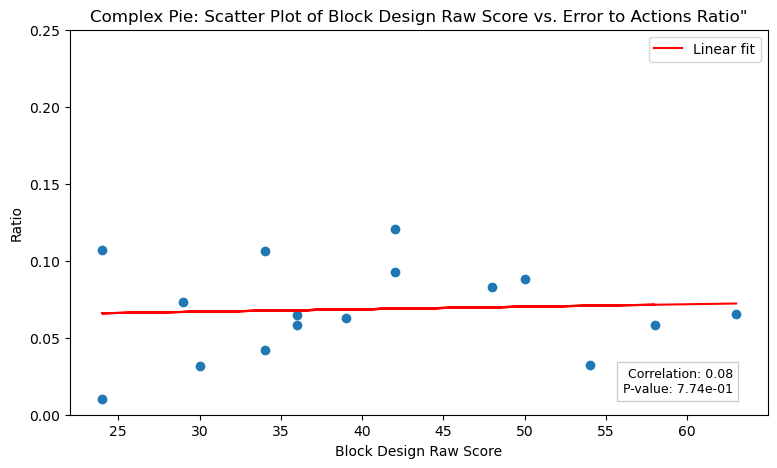

In [551]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Error to Actions Ratio"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Ratio')
plt.ylim(0,0.25)
plt.legend()
file_path = os.path.join(folder_path, '17 CP_ErrortoActions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Action Type and Block Design Score

In [552]:
action_type=pd.read_csv('ActionType_ComplexPie.csv')

In [553]:
action_type = action_type[['Participant', 'Chopped','Left Hand Grab','Left Hand Released','Right Hand Grab','Right Hand Released']]
final_df=pd.merge(final_df, action_type, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,...,Put pie in oven,Add butter,Add crust top,Add water,Error to Actions Ratio,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18,49,...,10,16,10,3,0.058480,21,14,13,72,51
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18,56,...,10,9,5,2,0.058140,24,15,15,70,48
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18,25,...,11,9,4,25,0.120603,13,54,27,69,36
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26,87,...,10,16,7,3,0.106299,25,22,16,114,77
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26,73,...,5,20,9,2,0.010101,21,7,7,89,74
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26,83,...,8,12,11,6,0.032389,17,31,21,97,81
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26,88,...,7,20,4,12,0.082707,22,66,51,76,51
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26,68,...,6,21,21,6,0.062500,21,53,38,55,41
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19,37,...,8,15,5,1,0.064706,17,24,18,67,44
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18,33,...,11,15,8,3,0.031532,23,29,26,84,60


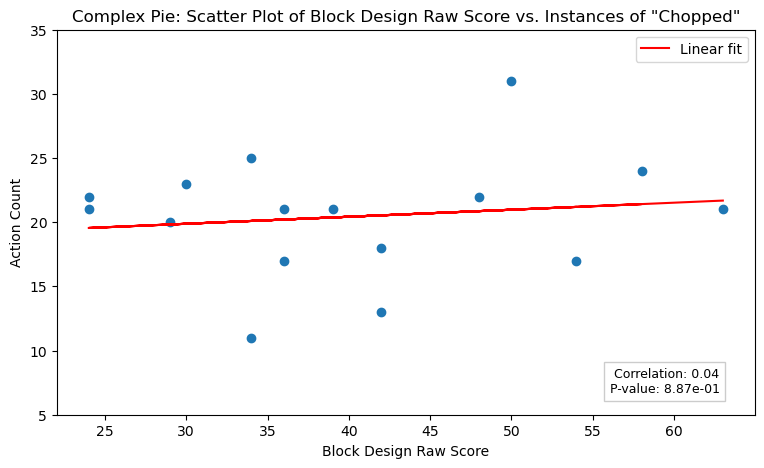

In [554]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Chopped'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Chopped'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Chopped'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Chopped"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(5,35)
plt.legend()
file_path = os.path.join(folder_path, '18 CP_CountChopped.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

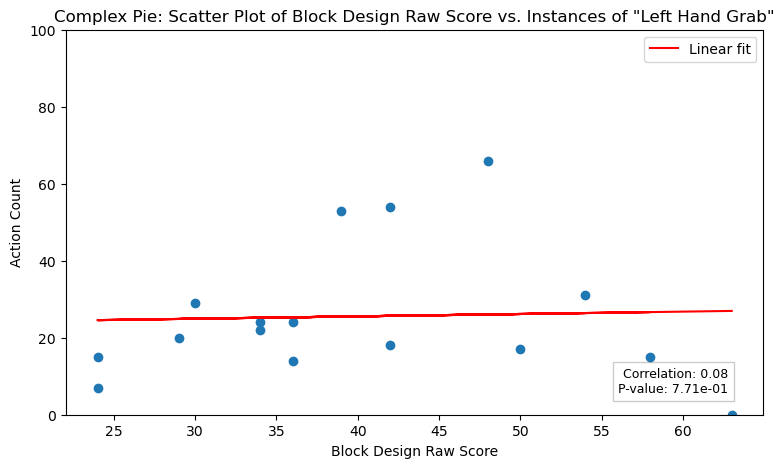

In [555]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Grab'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Grab'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Grab'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Left Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(0,100)
plt.legend()
file_path = os.path.join(folder_path, '19 CP_CountLeftHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

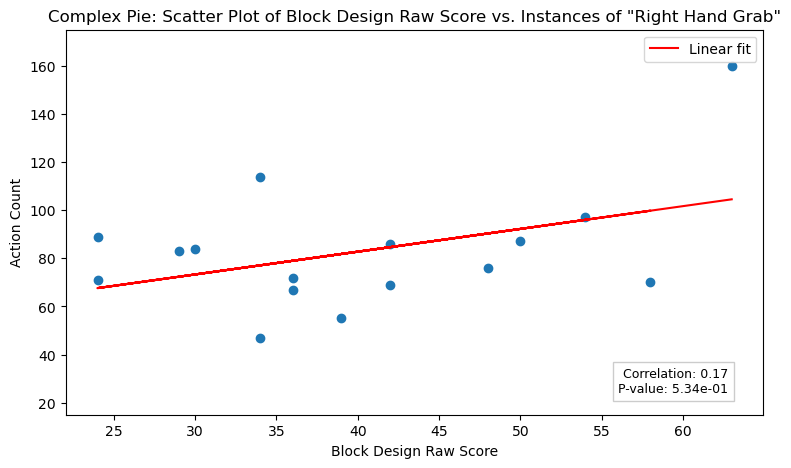

In [556]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Grab'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Grab'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Grab'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Right Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(15,175)
plt.legend()
file_path = os.path.join(folder_path, '20 CP_CountRightHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

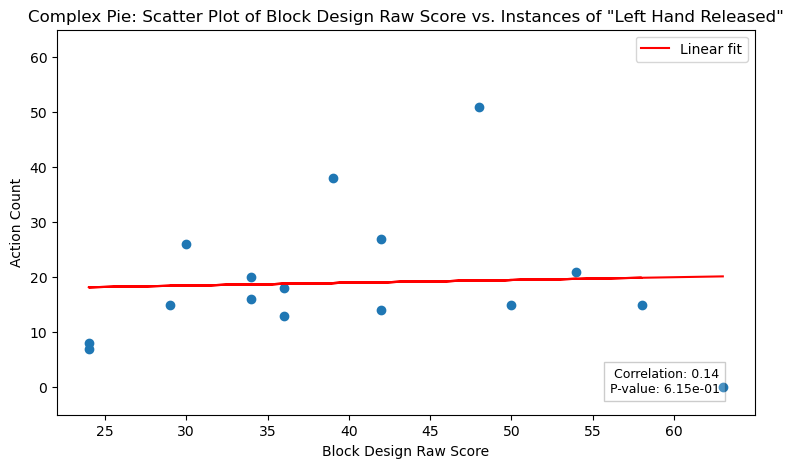

In [557]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Released'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Released'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Released'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Left Hand Released"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(-5,65)
plt.legend()
file_path = os.path.join(folder_path, '21 CP_CountLeftHandReleased.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

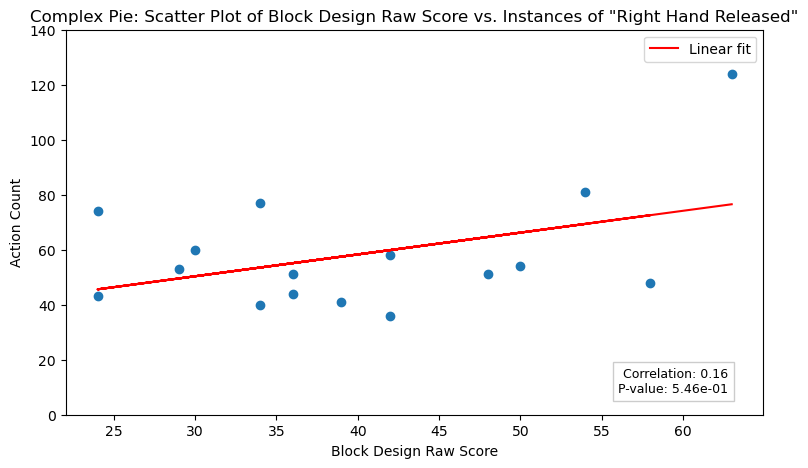

In [558]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Released'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Released'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Released'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Right Hand Released"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(0,140)
file_path = os.path.join(folder_path, '22 CP_CountRightHandReleased.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Missed Action Type and Block Design Score

In [559]:
actiontype_missed=pd.read_csv('ActionTypeMissed_ComplexPie.csv')

In [560]:
actiontype_missed = actiontype_missed.rename(columns={
    'Left Hand Grab': 'Left Hand Grab - Missed',
    'Right Hand Grab': 'Right Hand Grab - Missed'
})

In [561]:
actiontype_missed = actiontype_missed[['Participant','Left Hand Grab - Missed','Right Hand Grab - Missed']]
final_df=pd.merge(final_df, actiontype_missed, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,...,Add crust top,Add water,Error to Actions Ratio,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released,Left Hand Grab - Missed,Right Hand Grab - Missed
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18,49,...,10,3,0.058480,21,14,13,72,51,1,9
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18,56,...,5,2,0.058140,24,15,15,70,48,0,10
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18,25,...,4,25,0.120603,13,54,27,69,36,8,16
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26,87,...,7,3,0.106299,25,22,16,114,77,5,22
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26,73,...,9,2,0.010101,21,7,7,89,74,0,2
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26,83,...,11,6,0.032389,17,31,21,97,81,5,3
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26,88,...,4,12,0.082707,22,66,51,76,51,7,15
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26,68,...,21,6,0.062500,21,53,38,55,41,10,3
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19,37,...,5,1,0.064706,17,24,18,67,44,4,7
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18,33,...,8,3,0.031532,23,29,26,84,60,1,6


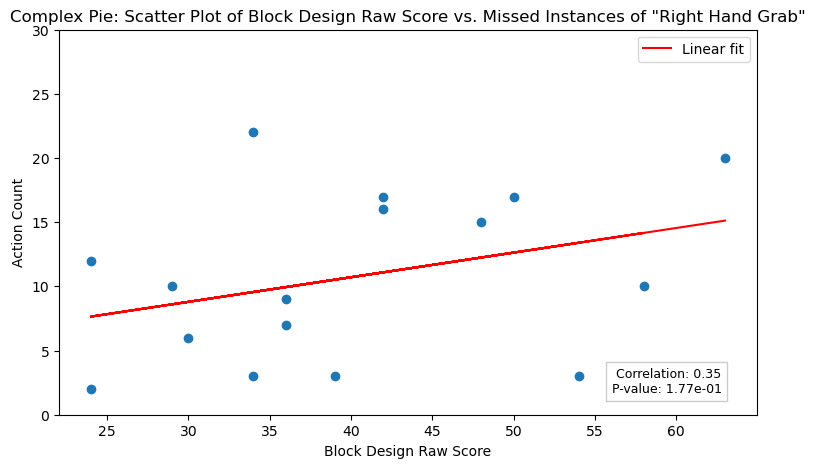

In [562]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Missed Instances of "Right Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(0,30)
plt.legend()
file_path = os.path.join(folder_path, '23 CP_MissedRightHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

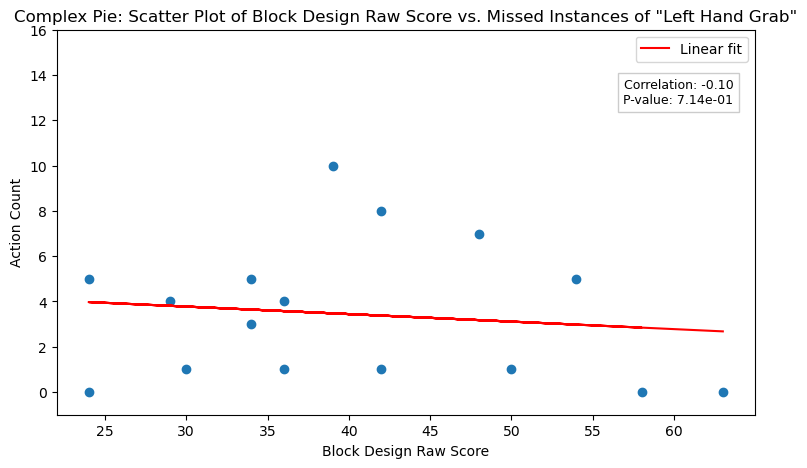

In [563]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.97, 0.80, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Missed Instances of "Left Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(-1,16)
plt.legend()
file_path = os.path.join(folder_path, '24 CP_MissedLeftHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Interacted objects per step & Block design score

In [564]:
IntOb = pd.read_csv('InteractedObjects_PerStep.csv')

In [565]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add Sugar ']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add sugar'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')

In [566]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add apples to pan']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add apples'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')

In [567]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add cinnamon']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add cinnamon'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')

In [568]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Stir bowl']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Stir bowl'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'outer')

In [569]:
final_df['Object Count - Stir bowl'] = final_df['Object Count - Stir bowl'].fillna(0)
final_df['Object Count - Stir bowl'] = final_df['Object Count - Stir bowl'].round().astype(int)

In [570]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add bottom crust']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add bottom crust'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'outer')

In [571]:
final_df['Object Count - Add bottom crust'] = final_df['Object Count - Add bottom crust'].fillna(0)
final_df['Object Count - Add bottom crust'] = final_df['Object Count - Add bottom crust'].round().astype(int)

In [572]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,...,Left Hand Released,Right Hand Grab,Right Hand Released,Left Hand Grab - Missed,Right Hand Grab - Missed,Object Count - Add sugar,Object Count - Add apples,Object Count - Add cinnamon,Object Count - Stir bowl,Object Count - Add bottom crust
0,C001,36,171,319.556571,10.0,161,21.491310,20.968374,18,49,...,13,72,51,1,9,12,75,26,11,2
1,C003,58,172,362.351788,10.0,162,35.154070,29.176267,18,56,...,15,70,48,0,10,5,100,2,9,7
2,C006,42,199,570.236635,24.0,175,56.950739,23.036730,18,25,...,27,69,36,8,16,11,72,11,24,3
3,C008,34,254,466.281171,27.0,227,58.660959,47.043500,26,87,...,16,114,77,5,22,9,153,5,16,3
4,C009,24,198,438.425413,2.0,196,47.728880,32.351198,26,73,...,7,89,74,0,2,11,113,4,17,5
5,C012,54,247,532.936495,8.0,239,53.877959,37.176239,26,83,...,21,97,81,5,3,7,131,14,37,7
6,C013,48,266,580.830070,22.0,244,61.982680,45.411052,26,88,...,51,76,51,7,15,7,156,6,13,6
7,C016,39,208,517.807503,13.0,195,46.610894,30.500671,26,68,...,38,55,41,10,3,7,106,10,9,9
8,C017,36,170,369.351203,11.0,159,35.590809,20.441936,19,37,...,18,67,44,4,7,9,48,2,59,6
9,C020,30,222,565.967667,7.0,215,34.357832,23.506672,18,33,...,26,84,60,1,6,11,52,78,19,8


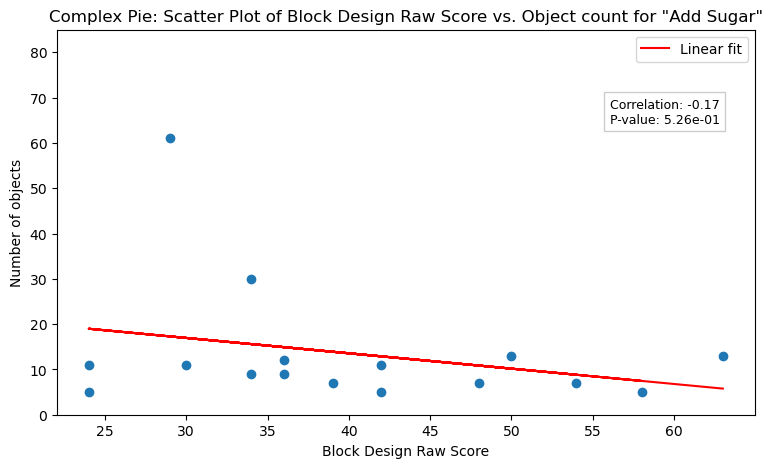

In [573]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add sugar'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add sugar'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(0,85)
plt.legend()
file_path = os.path.join(folder_path, '25 CP_ObjectAddSugar.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

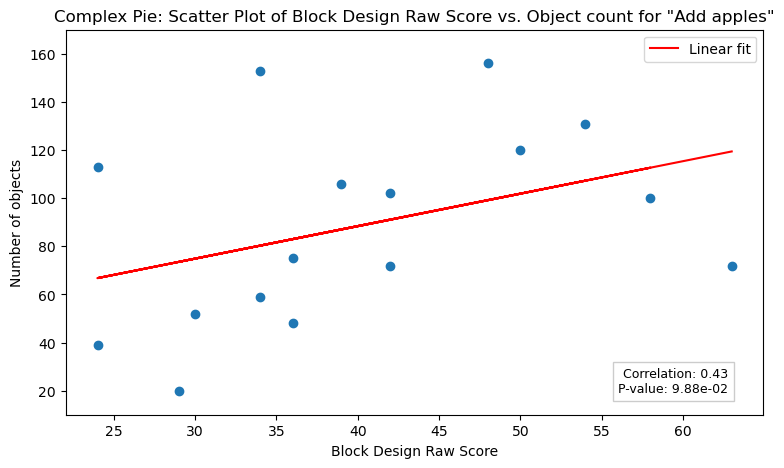

In [579]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add apples'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add apples'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add apples'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add apples"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(10,170)
plt.legend()
file_path = os.path.join(folder_path, '26 CP_ObjectAddapples.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

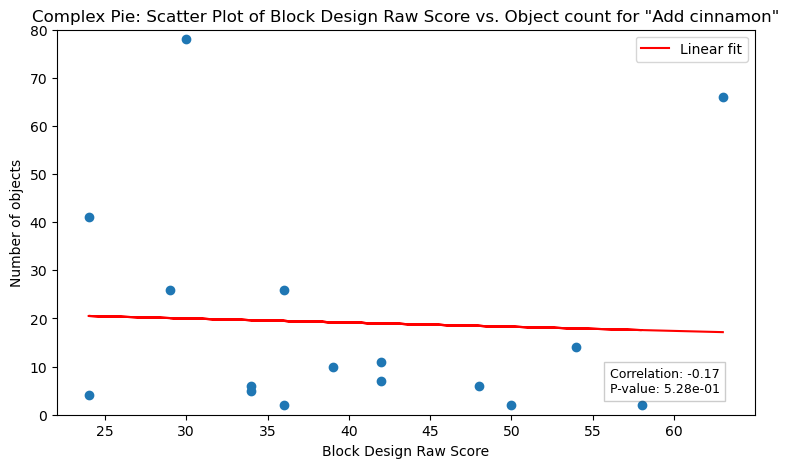

In [580]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add cinnamon'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(0,80)
plt.legend()
file_path = os.path.join(folder_path, '27 CP_ObjectAddCinnamon.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

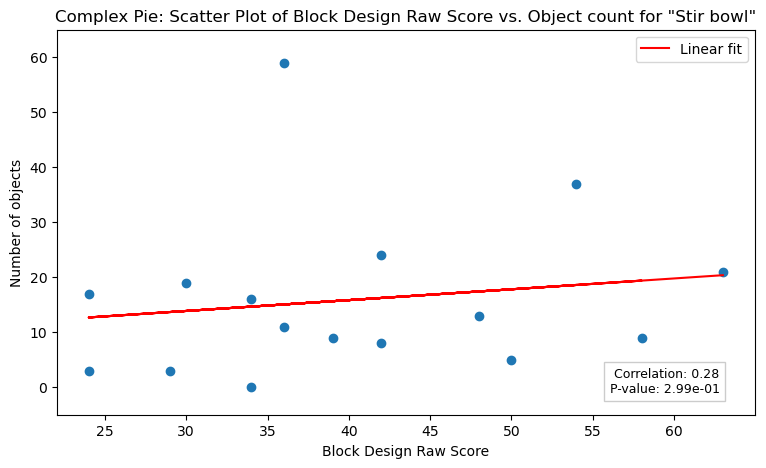

In [581]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Stir bowl'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Stir bowl'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Stir bowl'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Stir bowl"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(-5,65)
plt.legend()
file_path = os.path.join(folder_path, '28 CP_ObjectStirBowl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

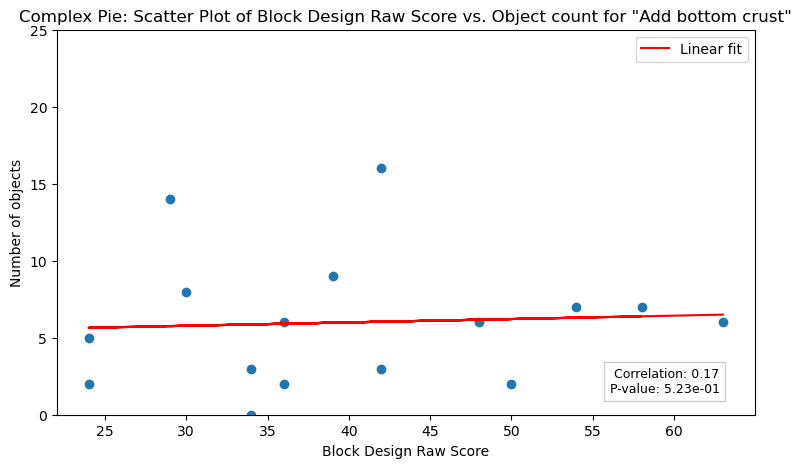

In [584]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add bottom crust'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add bottom crust'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add bottom crust'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add bottom crust"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(0,25)
plt.legend()
file_path = os.path.join(folder_path, '29 CP_ObjectAddBottomCrust.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [578]:
#final_df.to_csv('Features_ComplexPie.csv', index=False)